In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

train_data = pd.read_excel('F:/ImageCHD(from scratch)/Training/training_glcm_features.xlsx')
test_data = pd.read_excel('F:/ImageCHD(from scratch)/Test/Test_GLCM.xlsx')

# Separate Features (X) and Target (y)
X_train = train_data[['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']]
y_train = train_data['ASD']
X_test = test_data[['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']]
y_test = test_data['ASD']

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = rf_model.predict(X_test)
print("\n=== Random Forest Results ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


=== Random Forest Results ===
Accuracy: 0.84
Confusion Matrix:
[[20  4]
 [ 1  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        24
           1       0.71      0.82      0.81         9

    accuracy                           0.84        33
   macro avg       0.70      0.75      0.73        33
weighted avg       0.78      0.84      0.81        33


In [4]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load Train and Test Data
train_data = pd.read_excel('F:/ImageCHD(from scratch)/Training/training_glcm_features.xlsx')
test_data = pd.read_excel('F:/ImageCHD(from scratch)/Test/Test_GLCM.xlsx')

# Separate Features (X) and Target (y)
X_train = train_data[['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']]
y_train = train_data['ASD']
X_test = test_data[['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']]
y_test = test_data['ASD']

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict and Evaluate
y_pred = svm_model.predict(X_test_scaled)
print("\n===Results ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


=== Results ===
Accuracy: 0.73
Confusion Matrix:
[[20  4]
 [ 5  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        24
           1       0.65      0.85      0.84         9

    accuracy                           0.73        33
   macro avg       0.65      0.64      0.64        33
weighted avg       0.72      0.73      0.72        33


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load Train and Test Data
train_data = pd.read_excel('F:/ImageCHD(from scratch)/Training/training_glcm_features.xlsx')
test_data = pd.read_excel('F:/ImageCHD(from scratch)/Test/Test_GLCM.xlsx')


# Separate Features (X) and Target (y)
X_train = train_data[['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']]
y_train = train_data['ASD']
X_test = test_data[['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']]
y_test = test_data['ASD']

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = dt_model.predict(X_test)
print("\n=== Decision Tree Results ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


=== Decision Tree ===
Accuracy: 0.81
Confusion Matrix:
[[20  4]
 [ 1  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.69      0.79      0.78         9

    accuracy                           0.81        33
   macro avg       0.81      0.86      0.82        33
weighted avg       0.88      0.85      0.85        33


In [6]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load GLCM training and testing datasets
train_data = pd.read_excel('F:/ImageCHD(from scratch)/Training/training_glcm_features.xlsx')
test_data = pd.read_excel('F:/ImageCHD(from scratch)/Test/Test_GLCM.xlsx')

# Specify the columns to use for features and the target variable
feature_columns = ["Contrast", "Dissimilarity", "Homogeneity", "Energy", "Correlation"]
X_train = train_data[feature_columns]
y_train = train_data["ASD"]
X_test = test_data[feature_columns]
y_test = test_data["ASD"]

# Initialize and train the XGBoost model
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("--- XGBoost Results for GLCM ---")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== XGBoost Results ===
Accuracy: 0.87
Confusion Matrix:
[[21  3]
 [ 1  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.78      0.88      0.79         9

    accuracy                           0.87        33
   macro avg       0.84      0.88      0.85        33
weighted avg       0.89      0.88      0.88        33


In [ ]:
train_data = pd.read_excel('F:/ImageCHD(from scratch)/Training/training_glcm_features.xlsx')
test_data = pd.read_excel('F:/ImageCHD(from scratch)/Test/Test_GLCM.xlsx')

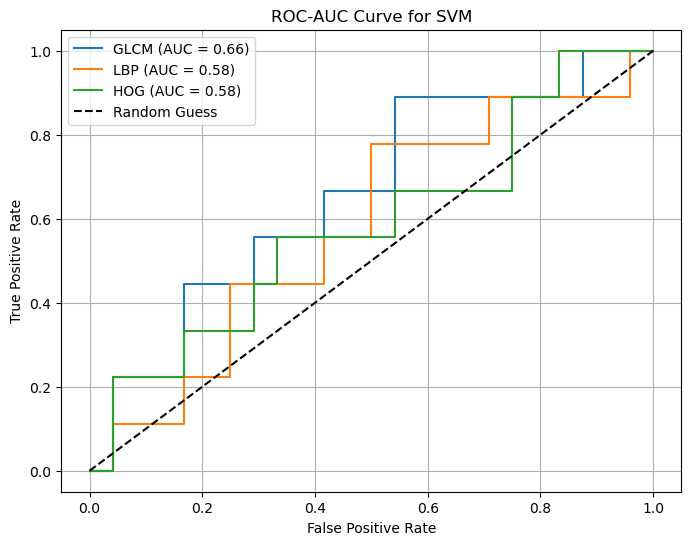

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Function to load data
def load_data(glcm_files, lbp_files, hog_files):
    # Load GLCM data
    glcm_train = pd.read_excel(glcm_files[0]).iloc[:, 1:]  # Skip the first column
    glcm_test = pd.read_excel(glcm_files[1]).iloc[:, 1:]
    
    # Load LBP data
    lbp_train = pd.read_excel(lbp_files[0]).iloc[:, 1:]  # Skip the first column
    lbp_test = pd.read_excel(lbp_files[1]).iloc[:, 1:]
    
    # Load HOG data
    hog_train = pd.read_excel(hog_files[0]).iloc[:, 1:]  # Skip the first column
    hog_test = pd.read_excel(hog_files[1]).iloc[:, 1:]
    
    return glcm_train, glcm_test, lbp_train, lbp_test, hog_train, hog_test

# Load data
glcm_files = ["F:/ImageCHD(from scratch)/Training/training_glcm_features.xlsx", "F:/ImageCHD(from scratch)/Test/Test_GLCM.xlsx"]
lbp_files = ["F:/ImageCHD(from scratch)/Training/training_lbp_features.xlsx", "F:/ImageCHD(from scratch)/Test/Test_LBP.xlsx"]
hog_files = ["F:/ImageCHD(from scratch)/Training/training_hog_feature.xlsx", "F:/ImageCHD(from scratch)/Test/Test_HOG.xlsx"]
(glcm_train, glcm_test, lbp_train, lbp_test, hog_train, hog_test) = load_data(glcm_files, lbp_files, hog_files)

# Train and test datasets
datasets = {
    "GLCM": (glcm_train, glcm_test),
    "LBP": (lbp_train, lbp_test),
    "HOG": (hog_train, hog_test),
}

# Initialize plot
plt.figure(figsize=(8, 6))

# Train and evaluate SVM on each dataset
for name, (train, test) in datasets.items():
    X_train = train.drop('ASD', axis=1)
    y_train = train['ASD']
    X_test = test.drop('ASD', axis=1)
    y_test = test['ASD']

    # Train SVM
    model = SVC(probability=True, kernel='linear', random_state=42)
    model.fit(X_train, y_train)

    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot customization
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC-AUC Curve for SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


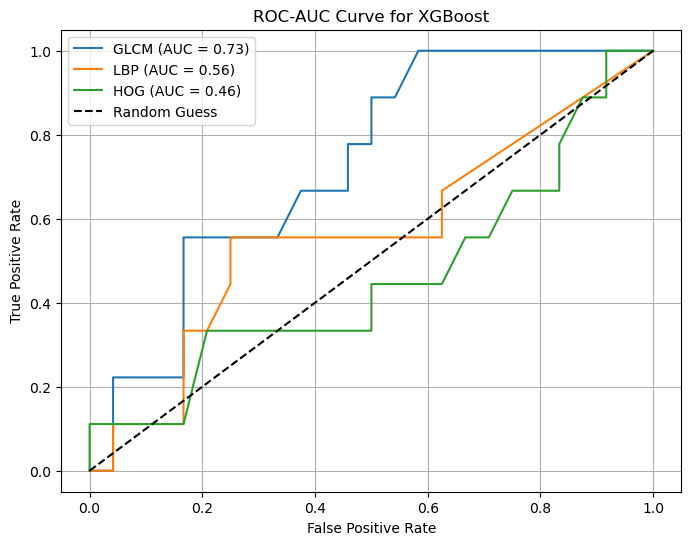

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Function to load data
def load_data(glcm_files, lbp_files, hog_files):
    # Load GLCM data
    glcm_train = pd.read_excel(glcm_files[0]).iloc[:, 1:]  # Skip the first column
    glcm_test = pd.read_excel(glcm_files[1]).iloc[:, 1:]
    
    # Load LBP data
    lbp_train = pd.read_excel(lbp_files[0]).iloc[:, 1:]  # Skip the first column
    lbp_test = pd.read_excel(lbp_files[1]).iloc[:, 1:]
    
    # Load HOG data
    hog_train = pd.read_excel(hog_files[0]).iloc[:, 1:]  # Skip the first column
    hog_test = pd.read_excel(hog_files[1]).iloc[:, 1:]
    
    return glcm_train, glcm_test, lbp_train, lbp_test, hog_train, hog_test

# Load data
glcm_files = ["F:/ImageCHD(from scratch)/Training/training_glcm_features.xlsx", "F:/ImageCHD(from scratch)/Test/Test_GLCM.xlsx"]
lbp_files = ["F:/ImageCHD(from scratch)/Training/training_lbp_features.xlsx", "F:/ImageCHD(from scratch)/Test/Test_LBP.xlsx"]
hog_files = ["F:/ImageCHD(from scratch)/Training/training_hog_feature.xlsx", "F:/ImageCHD(from scratch)/Test/Test_HOG.xlsx"]
(glcm_train, glcm_test, lbp_train, lbp_test, hog_train, hog_test) = load_data(glcm_files, lbp_files, hog_files)

# Train and test datasets
datasets = {
    "GLCM": (glcm_train, glcm_test),
    "LBP": (lbp_train, lbp_test),
    "HOG": (hog_train, hog_test),
}

# Initialize plot
plt.figure(figsize=(8, 6))

# Train and evaluate SVM on each dataset
for name, (train, test) in datasets.items():
    X_train = train.drop('ASD', axis=1)
    y_train = train['ASD']
    X_test = test.drop('ASD', axis=1)
    y_test = test['ASD']

    # Train SVM
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]


    # Calculate ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot customization
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC-AUC Curve for XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


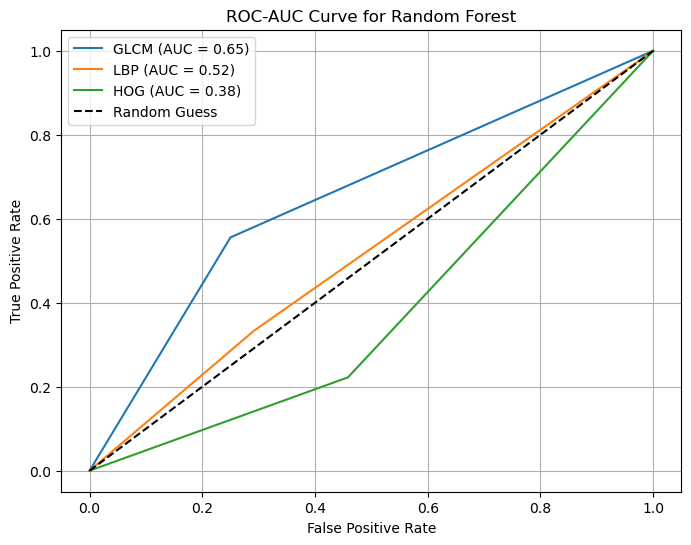

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Function to load data
def load_data(glcm_files, lbp_files, hog_files):
    # Load GLCM data
    glcm_train = pd.read_excel(glcm_files[0]).iloc[:, 1:]  # Skip the first column
    glcm_test = pd.read_excel(glcm_files[1]).iloc[:, 1:]
    
    # Load LBP data
    lbp_train = pd.read_excel(lbp_files[0]).iloc[:, 1:]  # Skip the first column
    lbp_test = pd.read_excel(lbp_files[1]).iloc[:, 1:]
    
    # Load HOG data
    hog_train = pd.read_excel(hog_files[0]).iloc[:, 1:]  # Skip the first column
    hog_test = pd.read_excel(hog_files[1]).iloc[:, 1:]
    
    return glcm_train, glcm_test, lbp_train, lbp_test, hog_train, hog_test

# Load data
glcm_files = ["F:/ImageCHD(from scratch)/Training/training_glcm_features.xlsx", "F:/ImageCHD(from scratch)/Test/Test_GLCM.xlsx"]
lbp_files = ["F:/ImageCHD(from scratch)/Training/training_lbp_features.xlsx", "F:/ImageCHD(from scratch)/Test/Test_LBP.xlsx"]
hog_files = ["F:/ImageCHD(from scratch)/Training/training_hog_feature.xlsx", "F:/ImageCHD(from scratch)/Test/Test_HOG.xlsx"]
(glcm_train, glcm_test, lbp_train, lbp_test, hog_train, hog_test) = load_data(glcm_files, lbp_files, hog_files)

# Train and test datasets
datasets = {
    "GLCM": (glcm_train, glcm_test),
    "LBP": (lbp_train, lbp_test),
    "HOG": (hog_train, hog_test),
}

# Initialize plot
plt.figure(figsize=(8, 6))

# Train and evaluate SVM on each dataset
for name, (train, test) in datasets.items():
    X_train = train.drop('ASD', axis=1)
    y_train = train['ASD']
    X_test = test.drop('ASD', axis=1)
    y_test = test['ASD']

    # Train SVM
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)


    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]


    # Calculate ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot customization
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC-AUC Curve for Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


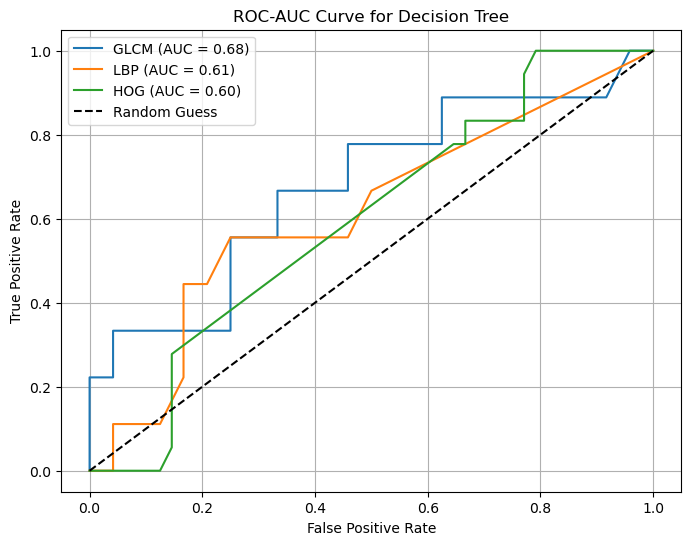

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# Function to load data
def load_data(glcm_files, lbp_files, hog_files):
    # Load GLCM data
    glcm_train = pd.read_excel(glcm_files[0]).iloc[:, 1:]  # Skip the first column
    glcm_test = pd.read_excel(glcm_files[1]).iloc[:, 1:]
    
    # Load LBP data
    lbp_train = pd.read_excel(lbp_files[0]).iloc[:, 1:]  # Skip the first column
    lbp_test = pd.read_excel(lbp_files[1]).iloc[:, 1:]
    
    # Load HOG data
    hog_train = pd.read_excel(hog_files[0]).iloc[:, 1:]  # Skip the first column
    hog_test = pd.read_excel(hog_files[1]).iloc[:, 1:]
    
    return glcm_train, glcm_test, lbp_train, lbp_test, hog_train, hog_test

# Load data
glcm_files = ["F:\Image CHD\ImageCHD_dataset\Training Data\glcm_features.xlsx", "F:\Image CHD\ImageCHD_dataset\Test Data\glcm_features2.xlsx"]
lbp_files = ["F:/ImageCHD(from scratch)/Training/training_lbp_features.xlsx", "F:/ImageCHD(from scratch)/Test/Test_LBP.xlsx"]
hog_files = ["F:/ImageCHD(from scratch)/Training/training_hog_feature.xlsx", "F:/ImageCHD(from scratch)/Test/Test_HOG.xlsx"]
(glcm_train, glcm_test, lbp_train, lbp_test, hog_train, hog_test) = load_data(glcm_files, lbp_files, hog_files)

# Train and test datasets
datasets = {
    "GLCM": (glcm_train, glcm_test),
    "LBP": (lbp_train, lbp_test),
    "HOG": (hog_train, hog_test),
}

# Initialize plot
plt.figure(figsize=(8, 6))

# Train and evaluate SVM on each dataset
for name, (train, test) in datasets.items():
    X_train = train.drop('ASD', axis=1)
    y_train = train['ASD']
    X_test = test.drop('ASD', axis=1)
    y_test = test['ASD']

    # Train SVM
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)


    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]


    # Calculate ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot customization
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC-AUC Curve for Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


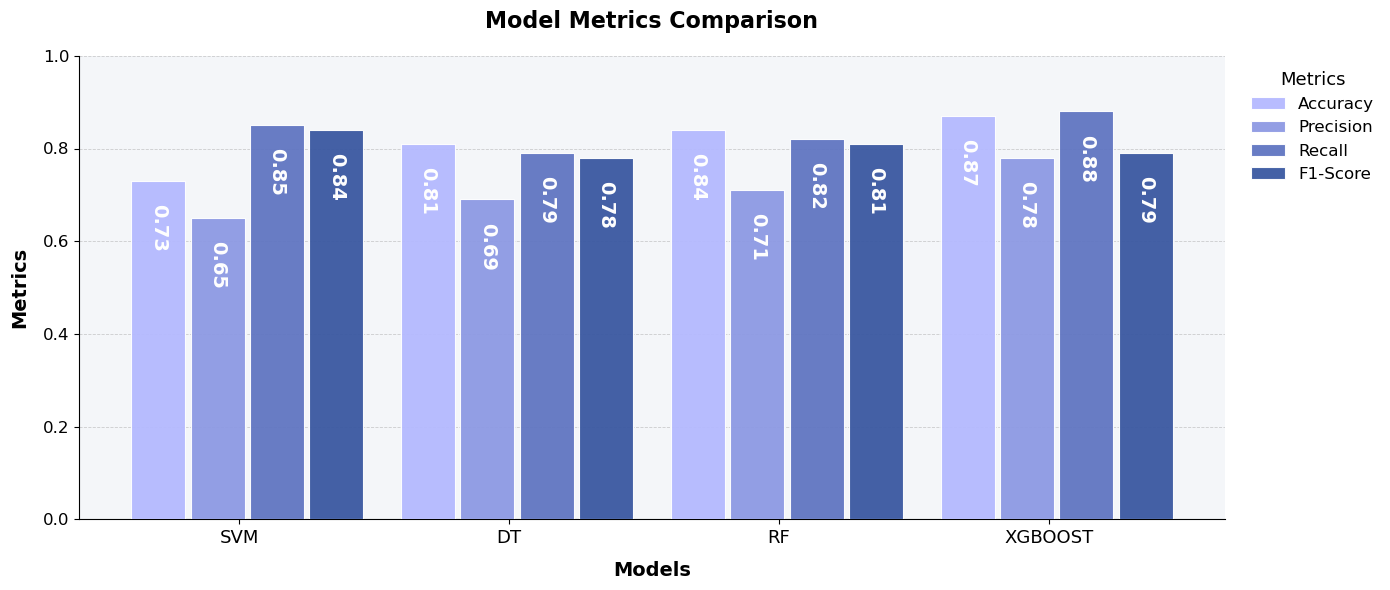

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Updated model order
models = ["SVM", "DT", "RF", "XGBOOST"]

# Updated values corresponding to the new order
values = [
    [0.73, 0.65, 0.85, 0.84],
    [0.81, 0.69, 0.79, 0.78],  # SVM
    [0.84, 0.71, 0.82, 0.81],    # RF
    [0.87, 0.78, 0.88, 0.79],  # XGBOOST
]

# Metrics for the chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Define bar chart parameters
n_models = len(models)
n_metrics = len(metrics)
group_width = 0.8  # Total width for each group
bar_width = group_width / n_metrics  # Individual bar width
x = np.arange(n_models)  # X positions for groups

# Define a more subtle color range
colors_subtle = [
    "#B4B9FF",  # Light blue
    "#8D99E3",  # Soft blue
    "#6075C1",  # Medium blue
    "#3A58A1"   # Dark blue
]

# Create the figure
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Plot bars with subtle gradient-like colors
for i, (metric, color) in enumerate(zip(metrics, colors_subtle)):
    # Adjust bar positions within groups with spacing
    bars = plt.bar(
        x + i * bar_width - group_width / 2 + bar_width / 2 + (i * 0.02),  # Add extra spacing for same group
        [row[i] for row in values],
        width=bar_width,
        edgecolor="white",
        linewidth=0.8,
        alpha=0.95,
        label=metric,
        color=color,
        zorder=3
    )
    
    # Add vertical text inside the bars
    for bar, val in zip(bars, [row[i] for row in values]):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() - 0.05,  # Near the top but inside the bar
            f"{val:.2f}",
            ha="center",
            va="top",
            fontsize=14,  # Increased font size
            rotation=270,  # Vertical text
            color="white",  # Text contrasts with bar
            weight="bold",
            zorder=4
        )

# Configure x-axis
plt.xticks(x, models, fontsize=13)
plt.xlabel("Models", fontsize=14, fontweight="bold", labelpad=10)

# Configure y-axis
plt.ylabel("Metrics", fontsize=14, fontweight="bold", labelpad=10)
plt.yticks(fontsize=12)
plt.ylim(0, 1)  # Ensure all bars fit within the frame

# Title
plt.title("Model Metrics Comparison", fontsize=16, fontweight="bold", pad=20)

# Add a clean legend
plt.legend(
    title="Metrics",
    fontsize=12,
    title_fontsize=13,
    loc="upper left",
    bbox_to_anchor=(1.01, 1),
    frameon=False
)

# Grid and background styling
ax.set_facecolor("#F4F6F9")  # Subtle light gray background
ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6, zorder=1)

# Remove borders for a clean look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Tight layout for spacing
plt.tight_layout()

# Display the chart
plt.show()


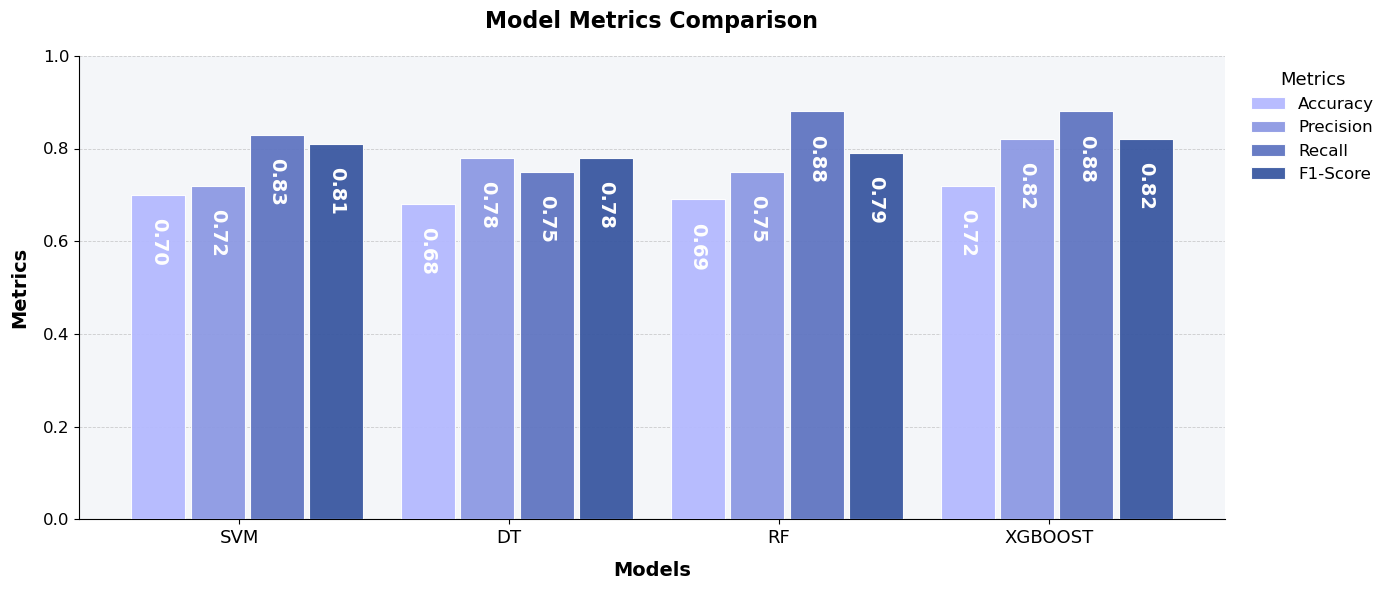

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Updated model order
models = ["SVM", "DT", "RF", "XGBOOST"]

# Updated values corresponding to the new order
values = [
    [0.70, 0.72, 0.83, 0.81],
    [0.68, 0.78, 0.75, 0.78],  # SVM
    [0.69, 0.75, 0.88, 0.79],    # RF
    [0.72, 0.82, 0.88, 0.82],  # XGBOOST
]

# Metrics for the chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Define bar chart parameters
n_models = len(models)
n_metrics = len(metrics)
group_width = 0.8  # Total width for each group
bar_width = group_width / n_metrics  # Individual bar width
x = np.arange(n_models)  # X positions for groups

# Define a more subtle color range
colors_subtle = [
    "#B4B9FF",  # Light blue
    "#8D99E3",  # Soft blue
    "#6075C1",  # Medium blue
    "#3A58A1"   # Dark blue
]

# Create the figure
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Plot bars with subtle gradient-like colors
for i, (metric, color) in enumerate(zip(metrics, colors_subtle)):
    # Adjust bar positions within groups with spacing
    bars = plt.bar(
        x + i * bar_width - group_width / 2 + bar_width / 2 + (i * 0.02),  # Add extra spacing for same group
        [row[i] for row in values],
        width=bar_width,
        edgecolor="white",
        linewidth=0.8,
        alpha=0.95,
        label=metric,
        color=color,
        zorder=3
    )
    
    # Add vertical text inside the bars
    for bar, val in zip(bars, [row[i] for row in values]):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() - 0.05,  # Near the top but inside the bar
            f"{val:.2f}",
            ha="center",
            va="top",
            fontsize=14,
            rotation=270,  # Vertical text
            color="white",  # Text contrasts with bar
            weight="bold",
            zorder=4
        )

# Configure x-axis
plt.xticks(x, models, fontsize=13)
plt.xlabel("Models", fontsize=14, fontweight="bold", labelpad=10)

# Configure y-axis
plt.ylabel("Metrics", fontsize=14, fontweight="bold", labelpad=10)
plt.yticks(fontsize=12)
plt.ylim(0, 1)  # Ensure all bars fit within the frame

# Title
plt.title("Model Metrics Comparison", fontsize=16, fontweight="bold", pad=20)

# Add a clean legend
plt.legend(
    title="Metrics",
    fontsize=12,
    title_fontsize=13,
    loc="upper left",
    bbox_to_anchor=(1.01, 1),
    frameon=False
)

# Grid and background styling
ax.set_facecolor("#F4F6F9")  # Subtle light gray background
ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6, zorder=1)

# Remove borders for a clean look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Tight layout for spacing
plt.tight_layout()

# Display the chart
plt.show()


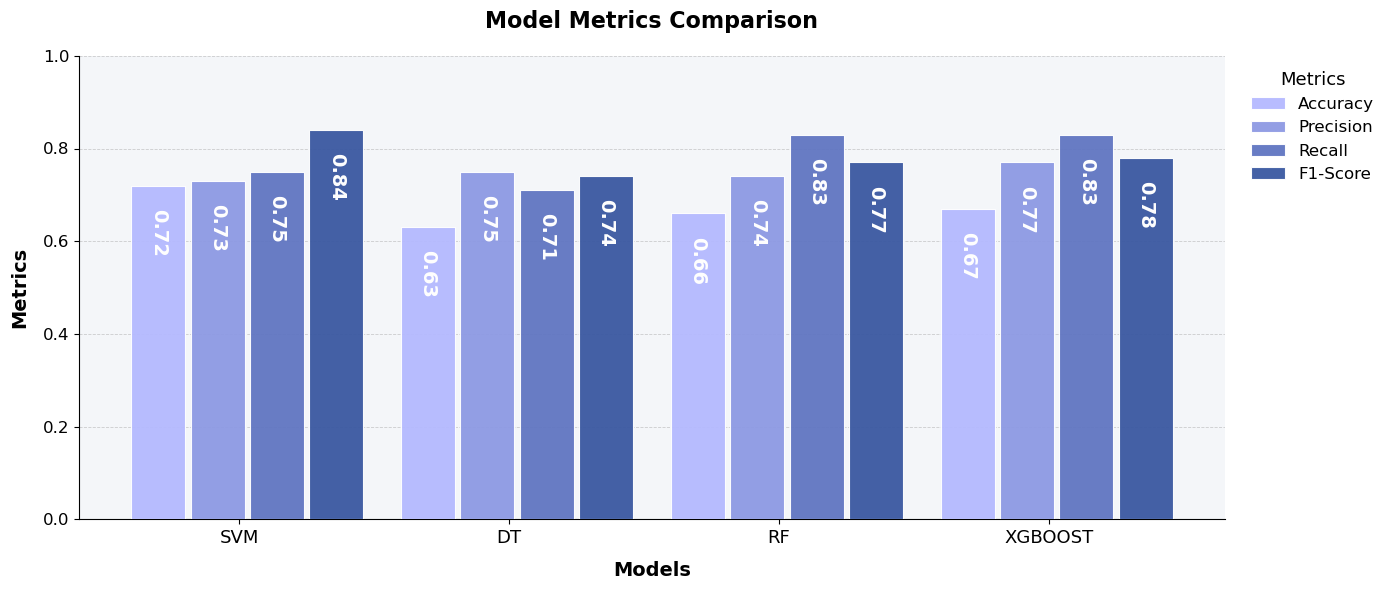

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Updated model order
models = ["SVM", "DT", "RF", "XGBOOST"]

# Updated values corresponding to the new order
values = [
    [0.72, 0.73, 0.75, 0.84],
    [0.63, 0.75, 0.71, 0.74],   # SVM
    [0.66, 0.74, 0.83, 0.77],    # RF
    [0.67, 0.77, 0.83, 0.78],  # XGBOOST
]

# Metrics for the chart
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Define bar chart parameters
n_models = len(models)
n_metrics = len(metrics)
group_width = 0.8  # Total width for each group
bar_width = group_width / n_metrics  # Individual bar width
x = np.arange(n_models)  # X positions for groups

# Define a more subtle color range
colors_subtle = [
    "#B4B9FF",  # Light blue
    "#8D99E3",  # Soft blue
    "#6075C1",  # Medium blue
    "#3A58A1"   # Dark blue
]

# Create the figure
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Plot bars with subtle gradient-like colors
for i, (metric, color) in enumerate(zip(metrics, colors_subtle)):
    # Adjust bar positions within groups with spacing
    bars = plt.bar(
        x + i * bar_width - group_width / 2 + bar_width / 2 + (i * 0.02),  # Add extra spacing for same group
        [row[i] for row in values],
        width=bar_width,
        edgecolor="white",
        linewidth=0.8,
        alpha=0.95,
        label=metric,
        color=color,
        zorder=3
    )
    
    # Add vertical text inside the bars
    for bar, val in zip(bars, [row[i] for row in values]):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() - 0.05,  # Near the top but inside the bar
            f"{val:.2f}",
            ha="center",
            va="top",
            fontsize=14,
            rotation=270,  # Vertical text
            color="white",  # Text contrasts with bar
            weight="bold",
            zorder=4
        )

# Configure x-axis
plt.xticks(x, models, fontsize=13)
plt.xlabel("Models", fontsize=14, fontweight="bold", labelpad=10)

# Configure y-axis
plt.ylabel("Metrics", fontsize=14, fontweight="bold", labelpad=10)
plt.yticks(fontsize=12)
plt.ylim(0, 1)  # Ensure all bars fit within the frame

# Title
plt.title("Model Metrics Comparison", fontsize=16, fontweight="bold", pad=20)

# Add a clean legend
plt.legend(
    title="Metrics",
    fontsize=12,
    title_fontsize=13,
    loc="upper left",
    bbox_to_anchor=(1.01, 1),
    frameon=False
)

# Grid and background styling
ax.set_facecolor("#F4F6F9")  # Subtle light gray background
ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.6, zorder=1)

# Remove borders for a clean look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Tight layout for spacing
plt.tight_layout()

# Display the chart
plt.show()
